# SIE LENS 
Analysing the images' properties in the case of SIE lens using GLAFIC.

~ Saif 01/03/22

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from gw_lens_dir.overlap_lensing_sie_twoimages import overlap_sie
from gw_lens_dir.L_unlensed import Lunlensed
pd.set_option('display.float_format', lambda x: '%.3e' % x)

#from pycbc.filter import match


/Users/saifali/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# CHECKING PURPOSE

solar_mass = 4.92624076 * 10**-6 #[solar_mass] = sec
giga_parsec = 1.02927125 * 10**17 #[giga_parsec] = sec
year = 31557600 #[year] = sec

def my_lin(lb, ub, steps, spacing = 3):
    span = (ub-lb)
    dx = 1.0 / (steps-1)
    return np.array([lb + (i * dx) ** spacing * span for i in range(steps)])

radius_range = np.linspace(0.29e-4, 1.98e-4, 10)

initial_params_source = {
    'theta_s_source' : 0.0, 
    'phi_s_source' : 0.0, 
    'theta_l_source' : 0.0, 
    'phi_l_source' : 0.0, 
    'mcz_source' : 18.79 * solar_mass, 
    'dist_source': 1.58 * giga_parsec, 
    'eta_source' : 0.25, 
    't0' : 0.0, 
    'phi_0' : 0.0,
    'radius': radius_range[9]
}

initial_params_template = {
    'theta_s_temp' : 0.0, 
    'phi_s_temp' : 0.0, 
    'theta_l_temp' : 0.0, 
    'phi_l_temp' : 0.0, 
    'mcz_temp' : 18.79 * solar_mass, 
    'dist_temp': 1.58 * giga_parsec, 
    'eta_temp' : 0.25, 
    #'tc' : 0.0, 
    #'phi_c' : 0.0,
}

# overlap_sie_init = overlap_sie(initial_params_source, initial_params_template)
#print(overlap_sie_init.limit(initial_params_source, initial_params_template))
# F = overlap_sie_init.F_source_sie(20)
# F

In [5]:
solar_mass = 4.92624076 * 10**-6 #[solar_mass] = sec
giga_parsec = 1.02927125 * 10**17 #[giga_parsec] = sec
year = 31557600 #[year] = sec

initial_params = {
    'theta_s' : 0.0, 
    'phi_s' : 0.0, 
    'theta_l' : 0.0, 
    'phi_l' : 0.0, 
    'mcz' : 15 * solar_mass, 
    'dist': 1.5 * giga_parsec, 
    'eta' : 0.25, 
    'tc' : 0.0, 
    'phi_c' : 0.0,
}

unlensed_init = Lunlensed(initial_params)
t_f_min = unlensed_init.get_tc()
t_f_min

(-0.004746203855166895, 127.57934396307618)

In [4]:
t_f_cut = 0.004746203855166895
t_f_min = 2.340307864891711
t_f_min - t_f_cut

2.335561661036544

In [ ]:
f = np.linspace(20, 102, 300)
amp = np.zeros_like(f, dtype = np.complex128)
integrand_1 = np.zeros_like(f, dtype = np.complex128)
integrand_2 = np.zeros_like(f, dtype = np.complex128)
integrand_3 = np.zeros_like(f, dtype = np.complex128)
signal_source = np.zeros_like(f, dtype = np.complex128)
signal_template = np.zeros_like(f, dtype = np.complex128)

for i in range(len(f)):
    #amp[i] = overlap_sie_init.F_source_sie(f[i])
    integrand_1[i] = overlap_sie_init.integrand_1(f[i], 0., 0.)
    integrand_2[i] = overlap_sie_init.integrand_2(f[i], 0., 0.)
    integrand_3[i] = overlap_sie_init.integrand_3(f[i], 0., 0.)
    signal_source[i] = overlap_sie_init.signal_source(f[i], 0., 0.)
    signal_template[i] = overlap_sie_init.signal_temp(f[i], 0., 0.)
    
plt.figure(figsize = (10, 8))
#plt.loglog(f, np.abs(amp))
ax1 = plt.subplot(211)
ax1.plot(f, np.abs(integrand_1), label = 'int 1')
ax1.plot(f, np.abs(integrand_2), label = 'int 2')
ax1.plot(f, np.abs(integrand_3), label = 'int 3')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(f, np.abs(signal_source), label = 'lensed')
ax2.plot(f, np.abs(signal_template), label = 'unlensed')
ax2.legend()

In [ ]:
overlap_sie_init = overlap_sie(initial_params_source, initial_params_template)
overlap = overlap_sie_init.overlap(x = (0., 0.))
overlap

In [2]:
datadirName = "/Users/saifali/Desktop/gwlensing/SIE_glafic/data/"
plotdirName = "/Users/saifali/Desktop/gwlensing/plots/"

In [3]:
# FOR SIGMA = 4 km/s

#einstein_rad = 0.0001767909
#mass_inside_einstein_rad = 11280.541428571429 sol_mass
data_einstein = '/Users/saifali/Desktop/gwlensing/SIE_glafic/out_ein2.dat'
output_einstein = np.loadtxt(data_einstein)
einstein_radius = output_einstein[-2]
print(einstein_radius)

# [MASS INSIDE EINSTEIN] = SOLAR MASS / h

mass_inside_einstein = output_einstein[-1]
print(mass_inside_einstein / 0.7)

theta = np.array([0, 30, 45, 60, 90])
fileName = ["radial_distance_caustics_0.csv",
            "radial_distance_caustics_30.csv",
           "radial_distance_caustics_45.csv",
            "radial_distance_caustics_60.csv",
           "radial_distance_caustics_90.csv"]

caustic_in = []
caustic_out = []

for i in range(len(fileName)):
    df_radial_distance = pd.read_csv(datadirName + fileName[i])
    df_get_radius_caustic_in = df_radial_distance.loc[df_radial_distance['images_num'] > 2.0]
    caustic_in.append(df_get_radius_caustic_in.iloc[-1]['radius'])
    df_get_radius_caustic_out = df_radial_distance.loc[df_radial_distance['images_num'] > 1.0]
    caustic_out.append(df_get_radius_caustic_out.iloc[-1]['radius'])

0.000223751
18069.242857142857


In [5]:
df_caustic_radii = pd.DataFrame(columns=('0', '30', '45', '60', '90'), index=('r_caustic_in', 'r_caustic_out'))
df_caustic_radii.loc['r_caustic_in'] = caustic_in 
df_caustic_radii.loc['r_caustic_out'] = caustic_out  
df_caustic_radii

,0,30,45,60,90
r_caustic_in,2.653e-05,1.404e-05,1.407e-05,1.548e-05,3.095e-05
r_caustic_out,2.023e-04,1.940e-04,1.907e-04,1.879e-04,1.868e-04


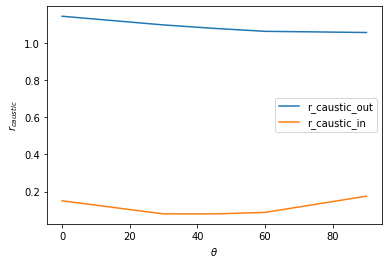

In [6]:
plt.plot(theta, caustic_out / einstein_radius, label = 'r_caustic_out')
plt.plot(theta, caustic_in / einstein_radius, label = 'r_caustic_in')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$r_{caustic}$')
plt.legend()
#plt.ylim(0, 1.3)
#plt.text(30, 1.2, 'ONE IMGAGE REGIME', color = 'red')
#plt.text(30, 0.6, 'TWO IMGAGES REGIME', color = 'blue')
#plt.text(30, 0.02, 'FOUR IMGAES REGIME', color = 'green')
#plt.savefig(plotdirName + "casutic_radius.eps")

************************************************************************************************************************

************************************************************************************************************************

In [7]:
def dataframe_sorted_two_images(dataframe):
    
    df_unsorted = dataframe
    
    old_td_ind = [[0, 1] for i in range(df_unsorted.shape[0])]
    new_td_ind = [[0, 0] for i in range(df_unsorted.shape[0])]

    sorted_arr = np.zeros(df_unsorted.shape)
    
    for i_row in range(df_unsorted.shape[0]):
        
        #df_sorted = pd.DataFrame(columns=('source_y', 'mu_1', 'mu_2', 'td_1', 'td_2'))
        old_td_arr = np.array(df_unsorted.loc[i_row][-2:])
        #print(old_td_arr)
        new_td_arr = np.sort(old_td_arr)
        #print(new_td_arr)
        
        new_td_ind[i_row][0] = np.where(new_td_arr[0] == old_td_arr)[0][0]
        new_td_ind[i_row][1] = np.where(new_td_arr[1] == old_td_arr)[0][0]
        
        old_mu_arr = np.array(df_unsorted.loc[i_row][1:3])
        #print(old_mu_arr)
        new_mu_arr = np.array([old_mu_arr[new_td_ind[i_row][0]], old_mu_arr[new_td_ind[i_row][1]]])
        #print(new_mu_arr)
        
        sorted_arr[i_row][0] = df_unsorted.loc[i_row][0]
        sorted_arr[i_row][1] = new_mu_arr[0]
        sorted_arr[i_row][2] = new_mu_arr[1]
        sorted_arr[i_row][3] = new_td_arr[0]
        sorted_arr[i_row][4] = new_td_arr[1]
        
    df_sorted = pd.DataFrame(sorted_arr, columns = ['source_y', 'mu_1', 'mu_2', 'td_1', 'td_2'])
    
    return df_sorted

## TWO IMAGES CASE

In [4]:
df_theta_0 = pd.read_csv(datadirName + "flux_twoimages_theta_0.csv")
df_theta_0['source_x'] = df_theta_0['source_x'] 
df_theta_0['td_2'] = df_theta_0['td_2'] * 86400 
df_theta_0['I'] = np.abs(df_theta_0['mu_2']) / np.abs(df_theta_0['mu_1'])
df_theta_0.to_csv(datadirName + "flux_twoimages_theta_0_sorted.csv", index = False)
#df_theta_0['low ft_d lim'] = df_theta_0['td_2'] * 20
df_theta_0

,source_x,mu_1,mu_2,td_1,td_2,I
0,2.900e-05,4.132e+00,-1.128e+02,0.000e+00,1.264e-01,2.729e+01
1,4.778e-05,3.350e+00,-7.695e+00,0.000e+00,2.082e-01,2.297e+00
2,6.656e-05,2.881e+00,-3.520e+00,0.000e+00,2.900e-01,1.222e+00
3,8.533e-05,2.568e+00,-2.054e+00,0.000e+00,3.718e-01,8.000e-01
4,1.041e-04,2.344e+00,-1.306e+00,0.000e+00,4.536e-01,5.572e-01
5,1.229e-04,2.176e+00,-8.523e-01,0.000e+00,5.354e-01,3.917e-01
6,1.417e-04,2.045e+00,-5.478e-01,0.000e+00,6.172e-01,2.678e-01
7,1.604e-04,1.941e+00,-3.293e-01,0.000e+00,6.991e-01,1.696e-01
8,1.792e-04,1.855e+00,-1.648e-01,0.000e+00,7.809e-01,8.883e-02
9,1.980e-04,1.784e+00,-3.657e-02,0.000e+00,8.627e-01,2.050e-02


In [17]:
df_theta_90 = pd.read_csv(datadirName + "flux_twoimages_theta_90.csv")
df_theta_90 = dataframe_sorted_two_images(df_theta_90)
df_theta_90['source_y'] = df_theta_90['source_y']
df_theta_90['td_2'] = df_theta_90['td_2'] * 86400 
df_theta_90['I'] = np.abs(df_theta_90['mu_2']) / np.abs(df_theta_90['mu_1'])
df_theta_90.to_csv(datadirName + "flux_twoimages_theta_90_sorted.csv", index = False)
df_theta_90

,source_y,mu_1,mu_2,td_1,td_2,I
0,3.300e-05,1.374e+02,-2.433e+00,0.000e+00,1.335e-01,1.770e-02
1,4.989e-05,1.294e+01,-1.719e+00,0.000e+00,2.018e-01,1.329e-01
2,6.678e-05,7.243e+00,-1.251e+00,0.000e+00,2.701e-01,1.728e-01
3,8.367e-05,5.226e+00,-9.209e-01,0.000e+00,3.384e-01,1.762e-01
4,1.006e-04,4.195e+00,-6.750e-01,0.000e+00,4.067e-01,1.609e-01
5,1.174e-04,3.568e+00,-4.849e-01,0.000e+00,4.751e-01,1.359e-01
6,1.343e-04,3.146e+00,-3.336e-01,0.000e+00,5.434e-01,1.060e-01
7,1.512e-04,2.844e+00,-2.102e-01,0.000e+00,6.117e-01,7.392e-02
8,1.681e-04,2.616e+00,-1.078e-01,0.000e+00,6.800e-01,4.119e-02
9,1.850e-04,2.439e+00,-2.130e-02,0.000e+00,7.483e-01,8.734e-03


In [42]:
df_theta_90_wo_flip = pd.read_csv(datadirName + "flux_twoimages_theta_90_wo_flip.csv")
df_theta_90_wo_flip['I'] = np.abs(df_theta_90_wo_flip['mu_2']) / np.abs(df_theta_90_wo_flip['mu_1'])
df_theta_90_wo_flip

FileNotFoundError: [Errno 2] No such file or directory: '/Users/saifali/Desktop/gwlensing/SIE_glafic/data/flux_twoimages_theta_90_wo_flip.csv'

In [43]:
df_theta_90_w_position = pd.read_csv(datadirName + "flux_twoimages_theta_90_w_position.csv")
df_theta_90_w_position['I'] = np.abs(df_theta_90_w_position['mu_2']) / np.abs(df_theta_90_w_position['mu_1'])
df_theta_90_w_position

FileNotFoundError: [Errno 2] No such file or directory: '/Users/saifali/Desktop/gwlensing/SIE_glafic/data/flux_twoimages_theta_90_w_position.csv'

In [16]:
df_theta_45 = pd.read_csv(datadirName + "flux_twoimages_theta_45.csv")
df_theta_45['source_x'] = df_theta_45['source_x'] 
df_theta_45['td_2'] = df_theta_45['td_2'] * 86400 
df_theta_45['I'] = np.abs(df_theta_45['mu_2']) / np.abs(df_theta_45['mu_1'])
df_theta_45.to_csv(datadirName + "flux_twoimages_theta_45_sorted.csv", index = False)
df_theta_45

,source_x,mu_1,mu_2,td_1,td_2,I
0,3.394e-05,4.634e+00,-3.194e+00,0.000e+00,1.538e-01,6.892e-01
1,5.028e-05,3.919e+00,-2.334e+00,0.000e+00,2.196e-01,5.955e-01
2,6.663e-05,3.409e+00,-1.708e+00,0.000e+00,2.866e-01,5.012e-01
3,8.297e-05,3.036e+00,-1.257e+00,0.000e+00,3.541e-01,4.138e-01
4,9.931e-05,2.757e+00,-9.233e-01,0.000e+00,4.221e-01,3.349e-01
5,1.157e-04,2.542e+00,-6.708e-01,0.000e+00,4.902e-01,2.639e-01
6,1.320e-04,2.372e+00,-4.743e-01,0.000e+00,5.585e-01,2.000e-01
7,1.483e-04,2.235e+00,-3.177e-01,0.000e+00,6.269e-01,1.422e-01
8,1.647e-04,2.122e+00,-1.904e-01,0.000e+00,6.953e-01,8.971e-02
9,1.810e-04,2.028e+00,-8.492e-02,0.000e+00,7.638e-01,4.188e-02


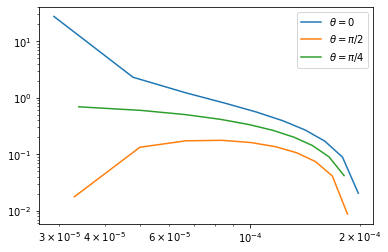

In [18]:
plt.loglog(np.array(df_theta_0['source_x']), np.array(df_theta_0['I']), label = r'$\theta = 0$')
plt.loglog(np.array(df_theta_90['source_y']), np.array(df_theta_90['I']), label = r'$\theta = \pi / 2$')
#plt.loglog(np.array(df_theta_90_wo_flip['source_y']), np.array(df_theta_90_wo_flip['I']), label = r'$\theta = \pi / 2$ wo flip')
plt.loglog(np.array(df_theta_45['source_x']), np.array(df_theta_45['I']), label = r'$\theta = \pi / 4$')
plt.legend(loc = 'best')

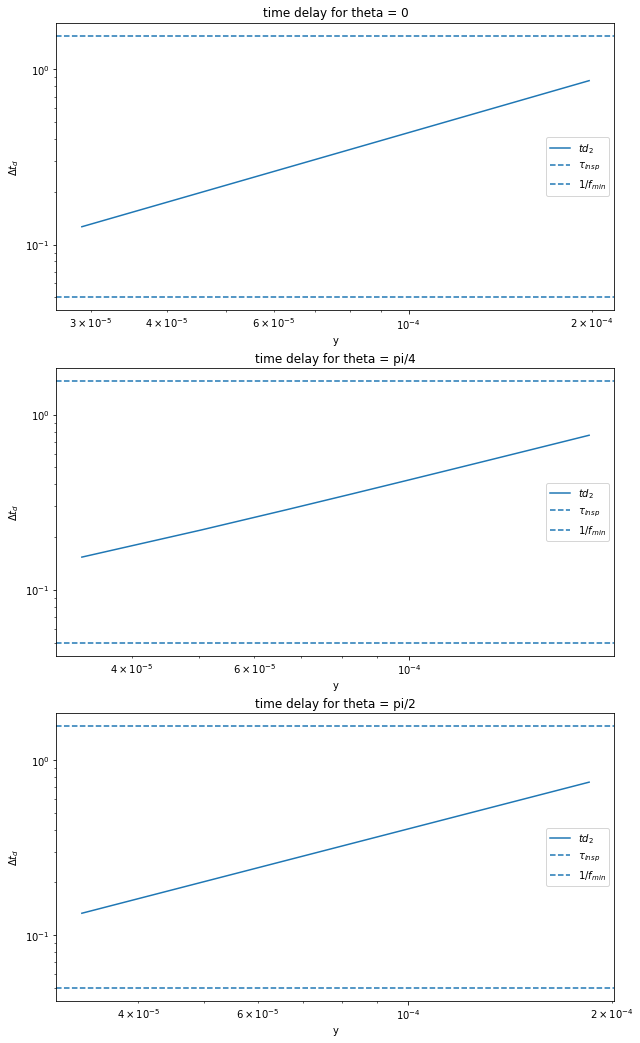

In [20]:
plt.figure(figsize = (10, 18))
# TIME DELAY PLOT FOR THETA = 0 DEG
plt.subplot(3, 1, 1)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_0['source_x']), np.array(df_theta_0['td_2']), label = r'$td_2$')
plt.axhline(y = 1.56, ls = '--', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '--', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = 0")
plt.legend()


# TIME DELAY PLOT FOR THETA = 45 DEG
plt.subplot(3, 1, 2)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_45['source_x']), np.array(df_theta_45['td_2']), label = r'$td_2$')
plt.axhline(y = 1.56, ls = '--', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '--', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = pi/4")
plt.legend()

# TIME DELAY PLOT FOR THETA = 90 DEG
plt.subplot(3, 1, 3)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_90['source_y']), np.array(df_theta_90['td_2']), label = r'$td_2$')
plt.axhline(y = 1.56, ls = '--', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '--', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = pi/2")
plt.legend()

************************************************************************************************************************

************************************************************************************************************************

## FOUR IMAGES CASE

In [27]:
def dataframe_sorted_four_images(dataframe):
    
    df_unsorted = dataframe
    
    old_td_ind = [[0, 1, 2, 3] for i in range(df_unsorted.shape[0])]
    new_td_ind = [[0, 0, 0, 0] for i in range(df_unsorted.shape[0])]
    
    sorted_arr = np.zeros(df_unsorted.shape)
    #print(sorted_arr)
    for i_row in range(df_unsorted.shape[0]):
        
        old_td_arr = np.array(df_unsorted.loc[i_row][-4:])
        #print(old_td_arr)
        new_td_arr = np.sort(old_td_arr)
        #print(new_td_arr)
       
        
        new_td_ind[i_row][0] = np.where(new_td_arr[0] == old_td_arr)[0][0]
        new_td_ind[i_row][1] = np.where(new_td_arr[1] == old_td_arr)[0][0]
        new_td_ind[i_row][2] = np.where(new_td_arr[2] == old_td_arr)[0][0]
        new_td_ind[i_row][3] = np.where(new_td_arr[3] == old_td_arr)[0][0]
        
        
        if len(new_td_ind[i_row]) != len(set(new_td_ind[i_row])):
            dup_ind = [idx for idx, item in enumerate(new_td_ind[i_row]) if item in new_td_ind[i_row][:idx]]
            new_td_ind[i_row][dup_ind[0]] += 1
            
        #if len(new_td_ind[i_row]) != len(set(new_td_ind[i_row])):
            #uniq_arr, dup_ind = np.unique(new_td_ind[i_row], return_index = True)
            #print(uniq_arr, dup_ind)
            #new_td_ind[i_row][dup_ind[-1]] += 1

        #print(new_td_ind[i_row])
        
        old_mu_arr = np.array(df_unsorted.loc[i_row][1:5])
        #print(old_mu_arr)
        new_mu_arr = np.array([old_mu_arr[new_td_ind[i_row][0]], old_mu_arr[new_td_ind[i_row][1]], old_mu_arr[new_td_ind[i_row][2]], 
                               old_mu_arr[new_td_ind[i_row][3]]])
        #print(new_mu_arr)
        #print('\n')
        sorted_arr[i_row][0] = df_unsorted.loc[i_row][0]
        sorted_arr[i_row][1] = new_mu_arr[0]
        sorted_arr[i_row][2] = new_mu_arr[1]
        sorted_arr[i_row][3] = new_mu_arr[2]
        sorted_arr[i_row][4] = new_mu_arr[3]
        sorted_arr[i_row][5] = new_td_arr[0]
        sorted_arr[i_row][6] = new_td_arr[1]
        sorted_arr[i_row][7] = new_td_arr[2]
        sorted_arr[i_row][8] = new_td_arr[3]
    #print(sorted_arr)   
    df_sorted = pd.DataFrame(sorted_arr, columns = ['source_x', 'mu_1', 'mu_2', 'mu_3', 'mu_4', 'td_1', 'td_2', 'td_3', 'td_4'])
    
    return df_sorted

In [28]:
df_theta_0_four = pd.read_csv(datadirName + "flux_fourimages_theta_0.csv")
df_theta_0_four = dataframe_sorted_four_images(df_theta_0_four)
df_theta_0_four['source_x'] = df_theta_0_four['source_x'] 
df_theta_0_four['td_2'] = df_theta_0_four['td_2'] * 86400 
df_theta_0_four['td_3'] = df_theta_0_four['td_3'] * 86400 
df_theta_0_four['td_4'] = df_theta_0_four['td_4'] * 86400 
df_theta_0_four['I_2'] = np.abs(df_theta_0_four['mu_2']) / np.abs(df_theta_0_four['mu_1'])
df_theta_0_four['I_3'] = np.abs(df_theta_0_four['mu_3']) / np.abs(df_theta_0_four['mu_1'])
df_theta_0_four['I_4'] = np.abs(df_theta_0_four['mu_4']) / np.abs(df_theta_0_four['mu_1'])
df_theta_0_four

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,1.500e-05,5.165e+00,1.520e+01,-8.792e+00,-8.792e+00,0.000e+00,6.536e-02,7.192e-02,7.192e-02,2.944e+00,1.702e+00,1.702e+00
1,1.622e-05,5.049e+00,1.675e+01,-9.508e+00,-9.508e+00,0.000e+00,7.068e-02,7.604e-02,7.604e-02,3.318e+00,1.883e+00,1.883e+00
2,1.744e-05,4.938e+00,1.868e+01,-1.042e+01,-1.042e+01,0.000e+00,7.601e-02,8.028e-02,8.028e-02,3.782e+00,2.109e+00,2.109e+00
3,1.867e-05,4.834e+00,2.114e+01,-1.160e+01,-1.160e+01,0.000e+00,8.133e-02,8.464e-02,8.464e-02,4.373e+00,2.399e+00,2.399e+00
4,1.989e-05,4.735e+00,2.439e+01,-1.318e+01,-1.318e+01,0.000e+00,8.666e-02,8.912e-02,8.912e-02,5.152e+00,2.783e+00,2.783e+00
5,2.111e-05,4.641e+00,2.891e+01,-1.539e+01,-1.539e+01,0.000e+00,9.198e-02,9.372e-02,9.372e-02,6.229e+00,3.316e+00,3.316e+00
6,2.233e-05,4.551e+00,3.558e+01,-1.868e+01,-1.868e+01,0.000e+00,9.731e-02,9.844e-02,9.844e-02,7.817e+00,4.104e+00,4.104e+00
7,2.356e-05,4.466e+00,4.644e+01,-2.407e+01,-2.407e+01,0.000e+00,1.026e-01,1.033e-01,1.033e-01,1.040e+01,5.389e+00,5.389e+00
8,2.478e-05,4.385e+00,6.726e+01,-3.444e+01,-3.444e+01,0.000e+00,1.080e-01,1.083e-01,1.083e-01,1.534e+01,7.854e+00,7.854e+00
9,2.600e-05,4.308e+00,1.233e+02,-6.241e+01,-6.241e+01,0.000e+00,1.133e-01,1.134e-01,1.134e-01,2.861e+01,1.449e+01,1.449e+01


In [29]:
df_theta_45_four = pd.read_csv(datadirName + "flux_fourimages_theta_45.csv")
df_theta_45_four = dataframe_sorted_four_images(df_theta_45_four)
df_theta_45_four['source_x'] = df_theta_45_four['source_x'] 
df_theta_45_four['td_2'] = df_theta_45_four['td_2'] * 86400 
df_theta_45_four['td_3'] = df_theta_45_four['td_3'] * 86400 
df_theta_45_four['td_4'] = df_theta_45_four['td_4'] * 86400 
df_theta_45_four['I_2'] = np.abs(df_theta_45_four['mu_2']) / np.abs(df_theta_45_four['mu_1'])
df_theta_45_four['I_3'] = np.abs(df_theta_45_four['mu_3']) / np.abs(df_theta_45_four['mu_1'])
df_theta_45_four['I_4'] = np.abs(df_theta_45_four['mu_4']) / np.abs(df_theta_45_four['mu_1'])
df_theta_45_four

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,1.273e-05,6.016e+00,1.647e+01,-1.500e+01,-4.682e+00,0.000e+00,3.707e-02,3.862e-02,7.298e-02,2.737e+00,2.494e+00,7.783e-01
1,1.289e-05,6.003e+00,1.712e+01,-1.565e+01,-4.670e+00,0.000e+00,3.746e-02,3.883e-02,7.354e-02,2.852e+00,2.608e+00,7.779e-01
2,1.304e-05,5.990e+00,1.786e+01,-1.640e+01,-4.657e+00,0.000e+00,3.785e-02,3.904e-02,7.411e-02,2.982e+00,2.738e+00,7.774e-01
3,1.320e-05,5.977e+00,1.873e+01,-1.727e+01,-4.644e+00,0.000e+00,3.823e-02,3.925e-02,7.467e-02,3.134e+00,2.889e+00,7.770e-01
4,1.336e-05,5.964e+00,1.976e+01,-1.829e+01,-4.632e+00,0.000e+00,3.861e-02,3.947e-02,7.524e-02,3.313e+00,3.067e+00,7.765e-01
5,1.351e-05,5.952e+00,2.100e+01,-1.953e+01,-4.619e+00,0.000e+00,3.899e-02,3.969e-02,7.581e-02,3.528e+00,3.282e+00,7.761e-01
6,1.367e-05,5.939e+00,2.253e+01,-2.107e+01,-4.606e+00,0.000e+00,3.936e-02,3.992e-02,7.637e-02,3.794e+00,3.547e+00,7.756e-01
7,1.383e-05,5.926e+00,2.450e+01,-2.303e+01,-4.594e+00,0.000e+00,3.972e-02,4.015e-02,7.694e-02,4.134e+00,3.887e+00,7.751e-01
8,1.399e-05,5.914e+00,2.716e+01,-2.569e+01,-4.581e+00,0.000e+00,4.008e-02,4.039e-02,7.751e-02,4.592e+00,4.344e+00,7.747e-01
9,1.414e-05,5.901e+00,3.101e+01,-2.955e+01,-4.569e+00,0.000e+00,4.043e-02,4.064e-02,7.808e-02,5.255e+00,5.007e+00,7.742e-01


In [30]:
df_theta_90_four = pd.read_csv(datadirName + "flux_fourimages_theta_90.csv")
df_theta_90_four = dataframe_sorted_four_images(df_theta_90_four)
df_theta_90_four['source_x'] = df_theta_90_four['source_x'] 
df_theta_90_four['td_2'] = df_theta_90_four['td_2'] * 86400 
df_theta_90_four['td_3'] = df_theta_90_four['td_3'] * 86400 
df_theta_90_four['td_4'] = df_theta_90_four['td_4'] * 86400 
df_theta_90_four['I_2'] = np.abs(df_theta_90_four['mu_2']) / np.abs(df_theta_90_four['mu_1'])
df_theta_90_four['I_3'] = np.abs(df_theta_90_four['mu_3']) / np.abs(df_theta_90_four['mu_1'])
df_theta_90_four['I_4'] = np.abs(df_theta_90_four['mu_4']) / np.abs(df_theta_90_four['mu_1'])
df_theta_90_four

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,2.000e-05,1.227e+01,1.227e+01,-1.842e+01,-3.301e+00,0.000e+00,1.317e-15,3.830e-03,8.473e-02,1.000e+00,1.501e+00,2.691e-01
1,2.111e-05,1.328e+01,1.328e+01,-2.052e+01,-3.210e+00,0.000e+00,3.373e-12,3.108e-03,8.850e-02,1.000e+00,1.546e+00,2.418e-01
2,2.222e-05,1.454e+01,1.454e+01,-2.313e+01,-3.123e+00,0.000e+00,3.875e-14,2.462e-03,9.235e-02,1.000e+00,1.591e+00,2.148e-01
3,2.333e-05,1.616e+01,1.616e+01,-2.646e+01,-3.039e+00,0.000e+00,7.121e-13,1.894e-03,9.628e-02,1.000e+00,1.637e+00,1.880e-01
4,2.444e-05,1.832e+01,1.832e+01,-3.086e+01,-2.959e+00,0.000e+00,4.114e-12,1.402e-03,1.003e-01,1.000e+00,1.684e+00,1.615e-01
5,2.556e-05,2.133e+01,2.133e+01,-3.694e+01,-2.881e+00,0.000e+00,3.293e-16,9.850e-04,1.044e-01,1.000e+00,1.732e+00,1.351e-01
6,2.667e-05,2.576e+01,2.576e+01,-4.589e+01,-2.807e+00,0.000e+00,5.123e-16,6.426e-04,1.085e-01,1.000e+00,1.781e+00,1.090e-01
7,2.778e-05,3.296e+01,3.296e+01,-6.035e+01,-2.736e+00,0.000e+00,3.659e-17,3.739e-04,1.127e-01,1.000e+00,1.831e+00,8.300e-02
8,2.889e-05,4.661e+01,4.661e+01,-8.771e+01,-2.667e+00,0.000e+00,7.589e-14,1.781e-04,1.170e-01,1.000e+00,1.882e+00,5.722e-02
9,3.000e-05,8.229e+01,8.229e+01,-1.591e+02,-2.600e+00,0.000e+00,1.371e-10,5.444e-05,1.214e-01,1.000e+00,1.934e+00,3.160e-02


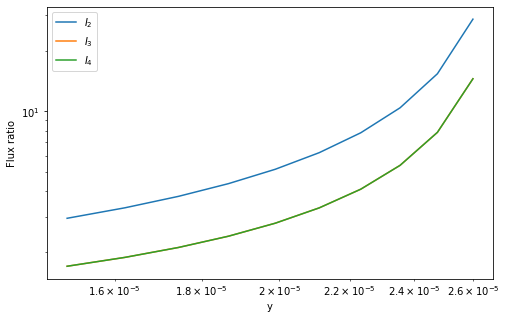

In [31]:
plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_0_four['source_x']), np.array(df_theta_0_four['I_2']), label = r'$I_2$')
plt.loglog(np.array(df_theta_0_four['source_x']), np.array(df_theta_0_four['I_3']), label = r'$I_3$')
plt.loglog(np.array(df_theta_0_four['source_x']), np.array(df_theta_0_four['I_4']), label = r'$I_4$')
plt.xlabel('y')
plt.ylabel('Flux ratio')
plt.legend()

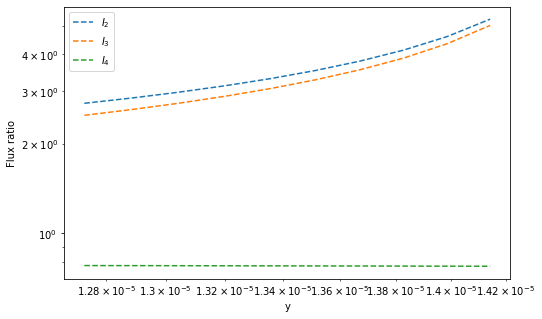

In [32]:
plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_45_four['source_x']), np.array(df_theta_45_four['I_2']), label = r'$I_2$', ls = '--')
plt.loglog(np.array(df_theta_45_four['source_x']), np.array(df_theta_45_four['I_3']), label = r'$I_3$', ls = '--')
plt.loglog(np.array(df_theta_45_four['source_x']), np.array(df_theta_45_four['I_4']), label = r'$I_4$', ls = '--')
plt.xlabel('y')
plt.ylabel('Flux ratio')
plt.legend()

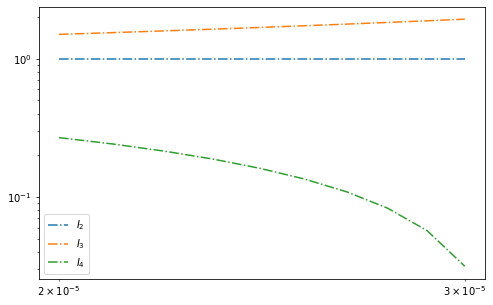

In [33]:
plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_90_four['source_x']), np.array(df_theta_90_four['I_2']), label = r'$I_2$', ls = '-.')
plt.loglog(np.array(df_theta_90_four['source_x']), np.array(df_theta_90_four['I_3']), label = r'$I_3$', ls = '-.')
plt.loglog(np.array(df_theta_90_four['source_x']), np.array(df_theta_90_four['I_4']), label = r'$I_4$', ls = '-.')
plt.legend()

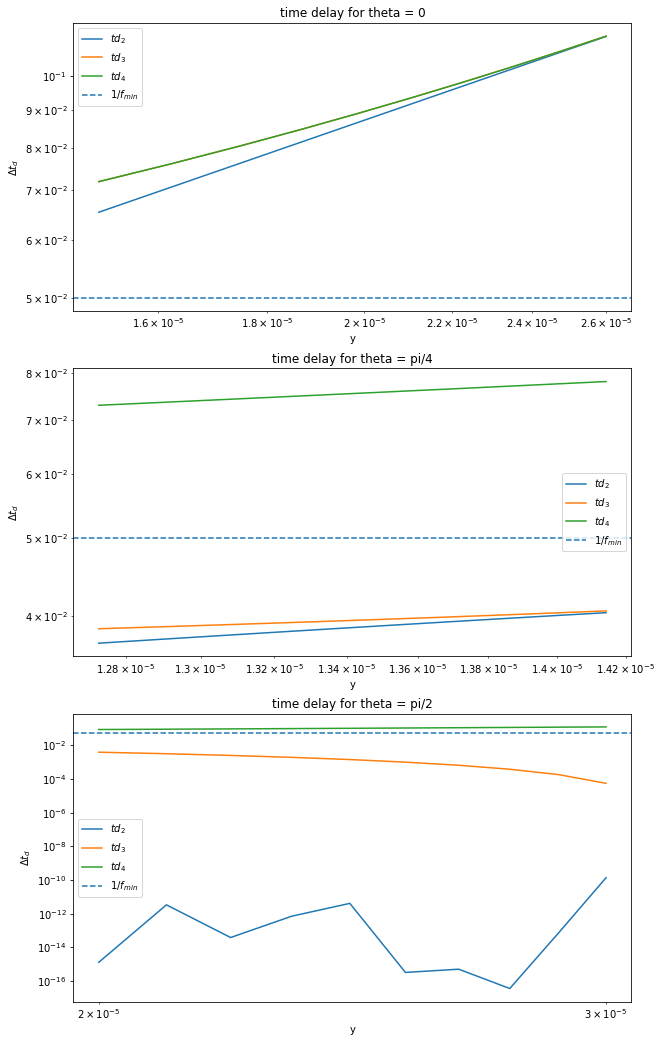

In [35]:
plt.figure(figsize = (10, 18))
# TIME DELAY PLOT FOR THETA = 0 DEG
plt.subplot(3, 1, 1)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_0_four['source_x']), np.array(df_theta_0_four['td_2']), label = r'$td_2$')
plt.loglog(np.array(df_theta_0_four['source_x']), np.array(df_theta_0_four['td_3']), label = r'$td_3$')
plt.loglog(np.array(df_theta_0_four['source_x']), np.array(df_theta_0_four['td_4']), label = r'$td_4$')
plt.axhline(y = 0.05, ls = '--', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = 0")
plt.legend()


# TIME DELAY PLOT FOR THETA = 45 DEG
plt.subplot(3, 1, 2)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_45_four['source_x']), np.array(df_theta_45_four['td_2']), label = r'$td_2$')
plt.loglog(np.array(df_theta_45_four['source_x']), np.array(df_theta_45_four['td_3']), label = r'$td_3$')
plt.loglog(np.array(df_theta_45_four['source_x']), np.array(df_theta_45_four['td_4']), label = r'$td_4$')
plt.axhline(y = 0.05, ls = '--', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = pi/4")
plt.legend()

# TIME DELAY PLOT FOR THETA = 90 DEG
plt.subplot(3, 1, 3)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_90_four['source_x']), np.array(df_theta_90_four['td_2']), label = r'$td_2$')
plt.loglog(np.array(df_theta_90_four['source_x']), np.array(df_theta_90_four['td_3']), label = r'$td_3$')
plt.loglog(np.array(df_theta_90_four['source_x']), np.array(df_theta_90_four['td_4']), label = r'$td_4$')
plt.axhline(y = 0.05, ls = '--', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = pi/2")
plt.legend()

## READING THE TIME DELAY SURFACE 

In [49]:
from astropy.io import fits
fits_time_delay = fits.open('/Users/saifali/Desktop/gwlensing/SIE_glafic/out_td_point.fits')
fits_time_delay.info()

Filename: /Users/saifali/Desktop/gwlensing/SIE_glafic/out_td_point.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (10, 10)   float32   


In [50]:
hdu_time_delay = fits_time_delay[0]
time_dalay_data = hdu_time_delay.data

In [51]:
x = np.arange(-5, 5, 0.2)
y = np.arange(-5, 5, 0.2)
xx, yy = np.meshgrid(x, y)

TypeError: Shape of x does not match that of z: found (50, 50) instead of (10, 10).

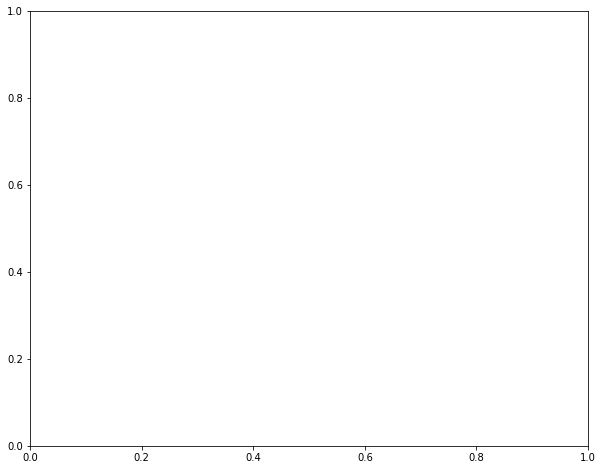

In [52]:
fig, ax = plt.subplots(figsize = (10, 8))
time_delay_surf = ax.contour(xx, yy, time_dalay_data, 100)
ax.plot(2.04880, 0, marker = 'x', label = 'td = 0')
ax.plot(-2.48800e-01, 0, marker = 'x', label = 'td = 48.22')
#plt.clabel(time_delay_surf, fontsize = 8)
#plt.title('x = 0.9, y = 0')
plt.legend()

## MISMATCHES FOR TWO IMAGES CASE

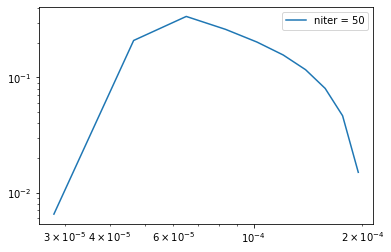

In [29]:
datapath = "/Users/saifali/Desktop/gwlensing/data/"
#df_niter_35 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_trial_niter=35.csv")
df_niter_50 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_trial_niter=50.csv")
df_leftend = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_niter=50_leftend_leftshift.csv")
#df_niter_80 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_niter=80.csv")
#plt.loglog(np.array(df_niter_35['source_x']), 1 - np.array(df_niter_35['overlap']), label = 'niter = 35')
#plt.loglog(np.array(df_niter_50['source_x']), 1 - np.array(df_niter_50['overlap']), label = 'niter = 50')
plt.loglog(np.array(df_leftend['source_x']), 1 - np.array(df_leftend['overlap']), label = 'niter = 50')
#plt.loglog(np.array(df_niter_50['source_x']), 1 - np.array(df_niter_50['overlap']), label = 'niter = 80')
plt.legend()

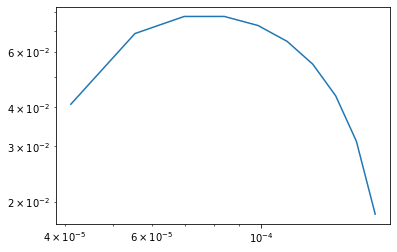

In [47]:
datapath = "/Users/saifali/Desktop/gwlensing/data/"
#df = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=90.csv")
df_trial = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=90_trial_cut_rightend.csv")
#plt.loglog(np.array(df['source_x']), 1 - np.array(df['overlap']))
plt.loglog(np.array(df_trial['source_x']), 1 - np.array(df_trial['overlap']))

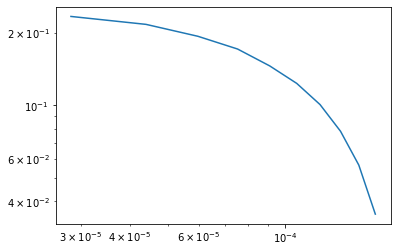

In [48]:
datapath = "/Users/saifali/Desktop/gwlensing/data/"
df_trial = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=45_niter=80.csv")
df_trial['source_x'] = df_trial['source_x'] * np.sqrt(2)
#plt.loglog(np.array(df['source_x']), 1 - np.array(df['overlap']))
plt.loglog(np.array(df_trial['source_x']), 1 - np.array(df_trial['overlap']))